## Final Project Submission

Please fill out:
* Student name: Kiprotich Emmanuel
* Student pace: self paced / part time 
* Scheduled project review date/time: 16/04/2023 
* Instructor name: Noah Kandie
* Blog post URL:


## Microsoft Movie Studio

## Business Problem

Microsoft sees all the big companies creating original video content, and they want to get in on the fun. They have decided to 
create a new movie studio, but the problem is they don’t know anything about creating movies. They have hired you to help them
better understand the movie industry. Your team is charged with exploring what type of films are currently doing the best at the
box office. You must then translate those findings into actionable insights that the head of Microsoft's new movie studio can
use to help decide what type of films to create.

## Variables

The project focused on below variables,
1. Revenue

2. Duration

3. marketting

## Research Questions

1. Which genre types are most likely to be received by the audience?
2. What are the most sucessful distribution channel for movies?
3. Which genre combination have the highest return on investment?


## Datasets

This project utilizes the movies datasets from below files

1.Box Office Mojo.

2.IMDB.

3.RottenTomatoes.

4.TheMovieDB.org.

The datasets were narrowed down to specific data to answer research questions. This include;

 bom.movie_gross.csv
 
 tmdb.movies.csv
 
 RottenTomatoes.csv

The datasets above is subject to exploration and analysis as in below section

## Data Understanding

* Exploration of datasets.

This is to understand the behaviour of the dataset

In [8]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom.head(5)


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [10]:
bom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [11]:
bom.tail(5)

,title,studio,domestic_gross,foreign_gross,year
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018
3386,An Actor Prepares,Grav.,1700.0,NaN,2018


* To check on behaviour of domestic gross dataset

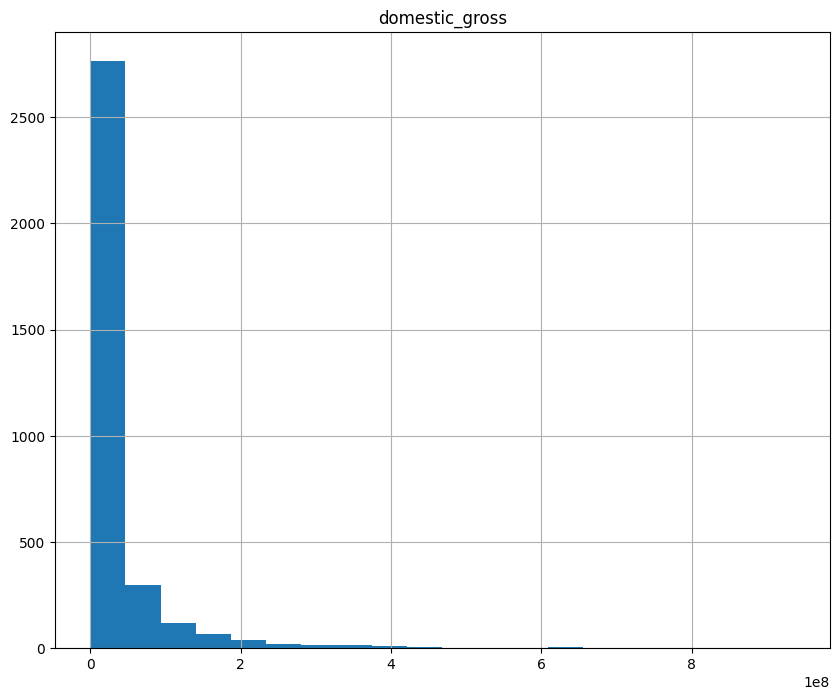

In [12]:
# Create a histogram plot for numerical columns
num_cols = ['domestic_gross']
bom[num_cols].hist(bins=20, figsize=(10, 8));
# plt.show()

* Checking the presence of outliers in the data

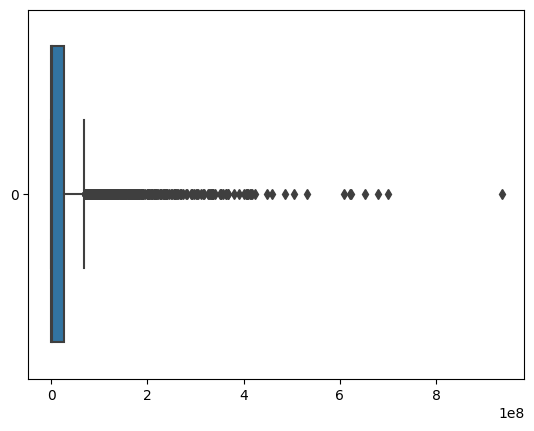

In [13]:
num_col = 'domestic_gross'
sns.boxplot(data=bom[num_col], orient='h');
# plt.title('Box Plot of Domestic Gross')
# plt.xlabel('Domestic Gross (in 100 millions USD)');
plt.show()

* To check the presence of NANs

In [14]:
foreign_gross_NaN=bom["foreign_gross"].isna().sum() #to check on NaNs number
domestic_gross_NaN= bom["domestic_gross"].isna().sum()
print(foreign_gross_NaN)
print(domestic_gross_NaN)

1350
28


* Loading tmdb data

In [15]:
tmdb_movies = pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
tmdb_movies.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [454]:
#To check the columns of tmdb movies

tmdb_movies.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [455]:
#To get the overal information of the data

tmdb_movies.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 23811 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


 Checking the number of NAN in the dataset

In [456]:
# Checking the number of NAN in the dataset
print(tmdb_movies.isna().sum().sum())

0


* To check on behaviour of popularity, vote average and vote_count

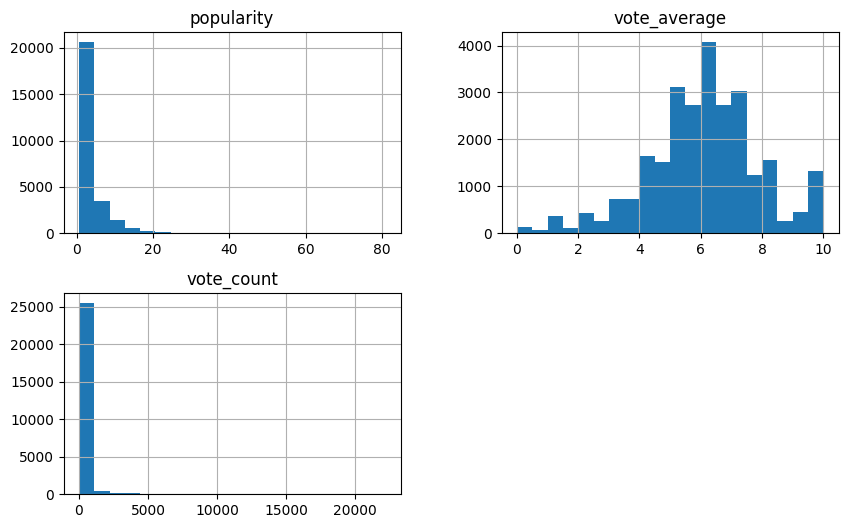

In [19]:

# Create a histogram plot for numerical columns
num_cols = ['popularity', 'vote_average', 'vote_count']
tmdb_movies[num_cols].hist(bins=20, figsize=(10, 6));
plt.show()

* Checking on presence of outliars

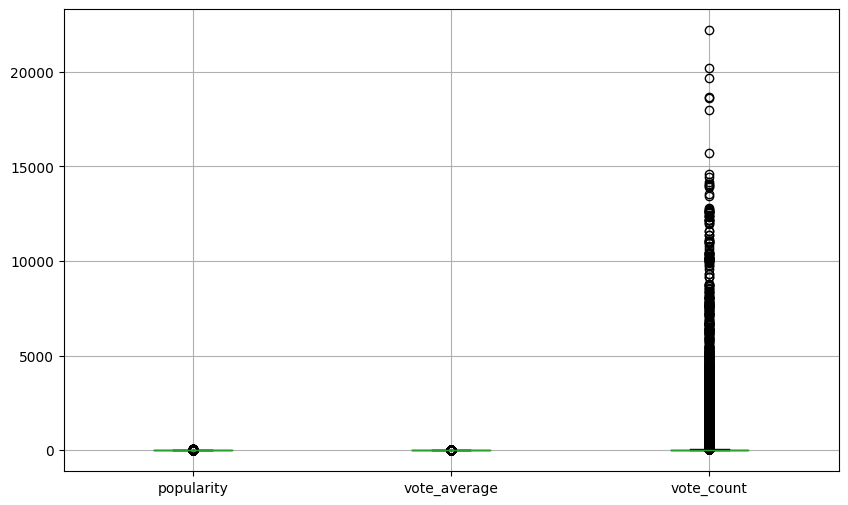

In [20]:
To have an overview of the whole data

num_cols = ['popularity', 'vote_average', 'vote_count']
tmdb_movies[num_cols].boxplot(figsize=(10, 6));
plt.show()

* To load rt_reviews and rt_info into notebook

In [137]:
rt_reviews = pd.read_csv("zippedData/rt.reviews.tsv.gz",index_col=0, sep='\t', encoding='unicode_escape')
rt_reviews.head(5)

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [138]:
rt_info = pd.read_csv("zippedData/rt.movie_info.tsv.gz",index_col=0, sep='\t')
rt_info.head(5)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


* To check on what the overal dataset entails

In [139]:
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [459]:
# checking on Null values

print(rt_reviews.isna().sum().sum())

22111


In [460]:
# checking on Null values on specific columns
print(rt_reviews[['rating', 'critic']].isna().sum())



rating    13517
critic     2722
dtype: int64


* Boxplot to undestand the review dataset

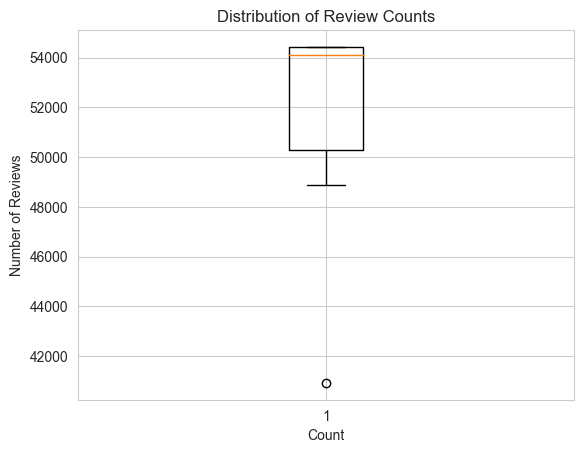

In [463]:
# create a boxplot

plt.boxplot(rt_reviews.count())

# add labels and title
plt.xlabel('Count')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Counts')

# display the plot
plt.show()

## Data Preparation, Analysis and Visualization


# Box Office Mojo.

In [466]:
# Reloading the data and printing the first  rows
bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
bom.head()


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [469]:
tn_movies = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)
tn_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


To check on presence of NaN values in the production_budget and worldwide_gross

In [144]:
print(tn_movies["production_budget"].isna().sum().sum())

0


In [145]:
print(tn_movies["worldwide_gross"].isna().sum().sum())

0


To clean the production_budget and worldwide_gross columns to remove all the usd sign and commas

In [188]:
tn_movies['worldwide_gross']=tn_movies['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
tn_movies['production_budget']=tn_movies['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

* Check whether the process is successfull

In [470]:
tn_movies.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [190]:
tn_movies['production_budget'].isna().any()


False

* The above codes are to be merged inorder to get total budget for production worldwide and also the worldwide gross revenue to enable computation of return on investment of the movie studio.

*Below is the merged data 

In [473]:

bom = pd.read_csv("zippedData/bom.movie_gross.csv.gz")
tn_movies = pd.read_csv("zippedData/tn.movie_budgets.csv.gz")

merged_df = pd.merge(bom, tn_movies, left_on='title', right_on='movie', how='inner')


* Merging two datase inorder to know which studio where best performing can be done

In [474]:
merged_df.head(5)

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [482]:
# To clean the production budget and worldwide gross columns


merged_df['worldwide_gross']=merged_df['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
merged_df['production_budget']=merged_df['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

In [205]:
merged_df.head(5)

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000.0,"$292,576,195",8.355246e+08
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,"$300,531,751",7.061028e+08
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000.0,"$312,433,331",6.211564e+08


* Computing for Return on investment

In [483]:
merged_df['profit'] = merged_df['worldwide_gross'] - merged_df['production_budget']
merged_df['roi'] = (merged_df['profit'] / merged_df['production_budget']) * 100


In [484]:
merged_df[['id', 'title', 'roi']]
merged_df = merged_df.sort_values(by='roi', ascending=False)

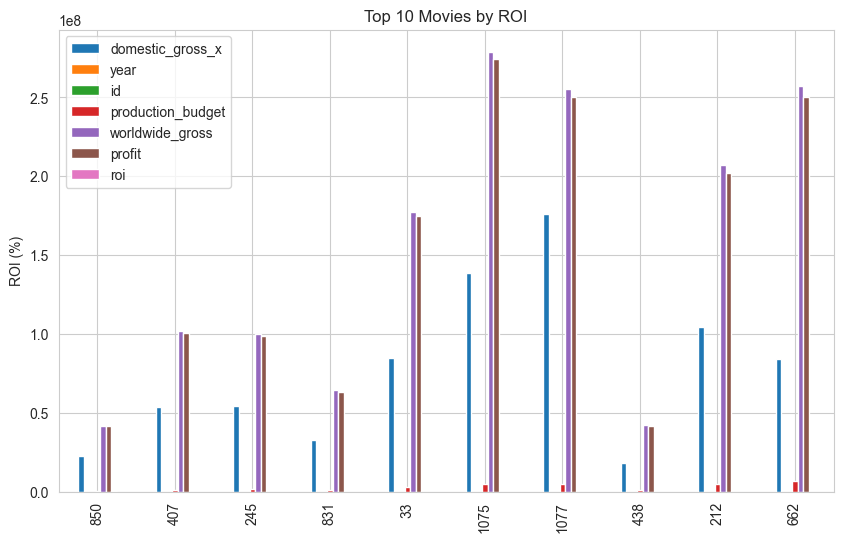

In [485]:
# create a bar graph of the top 10 movies by ROI

df = merged_df.set_index('title')



top_10 = merged_df.head(10)
ax = top_10.plot(kind='bar', figsize=(10, 6), legend=True)
ax.set_ylabel('ROI (%)')
ax.set_title('Top 10 Movies by ROI')
plt.show()

* To understand which studio is the best for movie production, production budget and returns

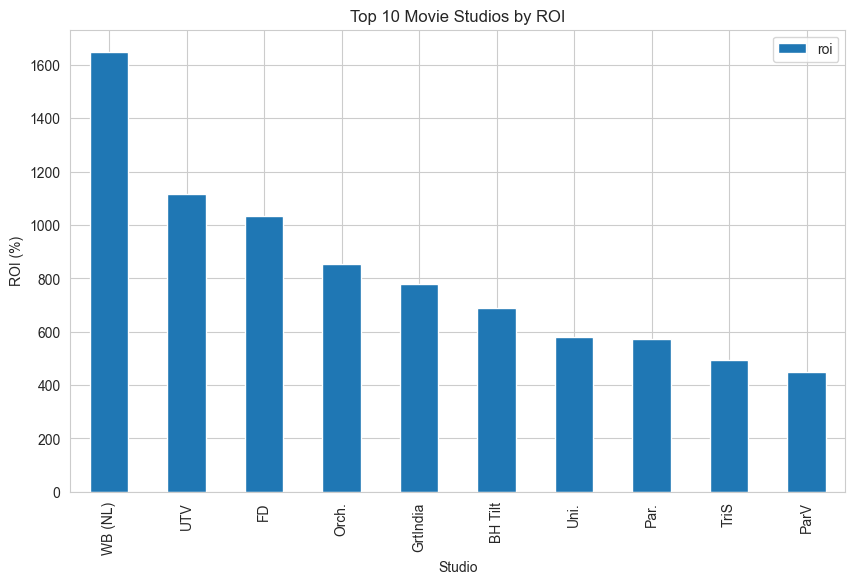

In [487]:
# create a bar graph of the top 10 movies by ROI

top_10 = merged_df.groupby('studio')['roi'].mean().nlargest(10) # group by studio and get the mean ROI, then get the top 10
ax = top_10.plot(kind='bar', figsize=(10, 6), legend=True)
ax.set_ylabel('ROI (%)')
ax.set_xlabel('Studio')
ax.set_title('Top 10 Movie Studios by ROI')

# set the x-axis labels to the top 10 studios
ax.set_xticklabels(top_10.index)

plt.show()


In [488]:
# to select only concerne columns

selected_columns = ['title','id', 'production_budget', 'worldwide_gross', 'roi']
new_df = merged_df[selected_columns]
new_df.head(5)


,title,id,production_budget,worldwide_gross,roi
850,The Gallows,80,100000.0,41656474.0,41556.474000
407,The Devil Inside,12,1000000.0,101759490.0,10075.949000
245,Insidious,63,1500000.0,99870886.0,6558.059067
831,Unfriended,14,1000000.0,64364198.0,6336.419800
33,Paranormal Activity 2,65,3000000.0,177512032.0,5817.067733


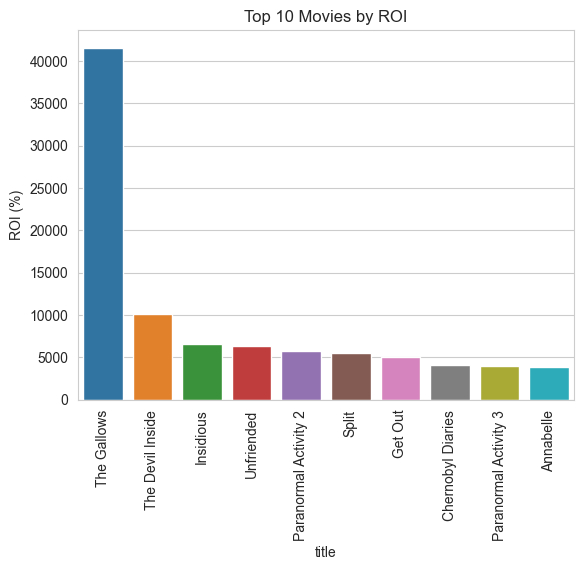

In [489]:

# create a bar graph of the top 10 movies by ROI


top_10 = merged_df.head(10)
sns.barplot(x=top_10.title, y='roi', data=top_10)
plt.xticks(rotation=90)
plt.ylabel('ROI (%)')
plt.title('Top 10 Movies by ROI')
plt.show()


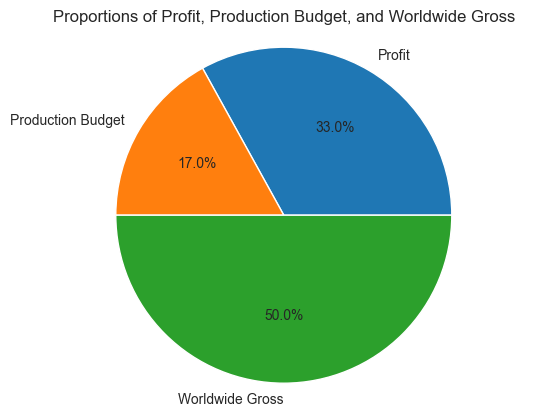

In [573]:
# pie chart to show profit, production budget and worldwide gross


# Calculate total profit, production budget, and worldwide gross
total_profit = selected_df['profit'].sum()
total_budget = selected_df['production_budget'].sum()
total_gross = selected_df['worldwide_gross'].sum()

# Create data and labels for the pie chart
data = [total_profit, total_budget, total_gross]
labels = ['Profit', 'Production Budget', 'Worldwide Gross']

# Create the pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Proportions of Profit, Production Budget, and Worldwide Gross')
plt.axis('equal')

plt.show()


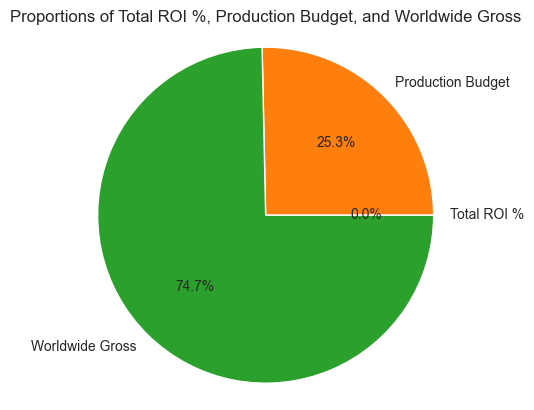

In [574]:
# Calculate total ROI percentage, production budget, and worldwide gross

total_roi = selected_df['roi'].sum()
total_budget = selected_df['production_budget'].sum()
total_gross = selected_df['worldwide_gross'].sum()

# Create data and labels for the pie chart
data = [total_roi, total_budget, total_gross]
labels = ['Total ROI %', 'Production Budget', 'Worldwide Gross']

# Create the pie chart
plt.pie(data, labels=labels, autopct='%1.1f%%')
plt.title('Proportions of Total ROI %, Production Budget, and Worldwide Gross')
plt.axis('equal')

plt.show()


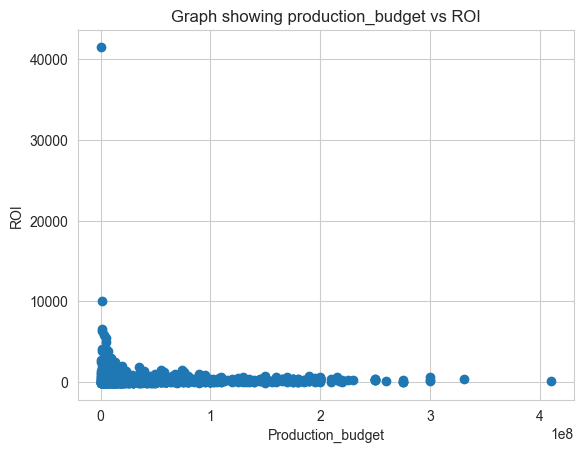

In [560]:
# create a scatter plot of production budget vs ROI. 


plt.scatter(new_df['production_budget'], new_df['roi'])
plt.xlabel('Production_budget')
plt.ylabel('ROI')
plt.title('Graph showing production_budget vs ROI');

* correlation analysis.

In [561]:
correlation_coeff = new_df['production_budget'].corr(new_df['roi'])
print("Pearson correlation coefficient:", correlation_coeff)


Pearson correlation coefficient: -0.06980389548323096


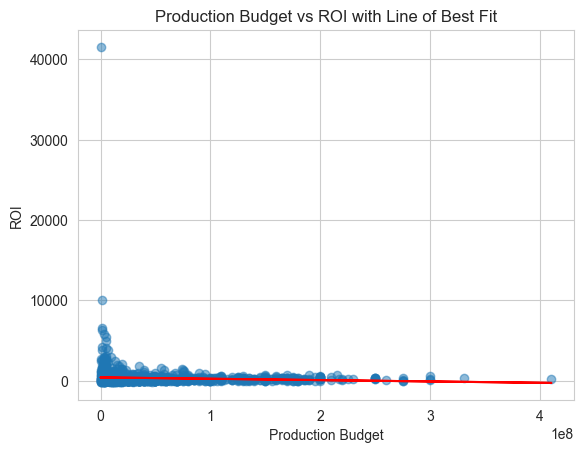

In [564]:
# create x and y variables
x = new_df['production_budget']
y = new_df['roi']

# calculate line of best fit
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope*x + intercept

# create scatter plot with line of best fit
plt.scatter(x, y, alpha=0.5)
plt.plot(x, line, color='red')

# add labels and title
plt.xlabel('Production Budget')
plt.ylabel('ROI')
plt.title('Production Budget vs ROI with Line of Best Fit')

# display plot
plt.show()

Result: There is negative corellation between budget and roi. Big budget movies tend to do worse than low budget movies, per $ invested.
Assumption: Microsoft has a potential  to invest heavy on budget movies: Microsoft has the upfront cash to 
acquire expensive IP which could potentially be turned into more or less guaranteed profit, but would need decent budgets to make that money back.


# tmdb_movies.csv

* Data Wrangling

* Cleaning and analysing the tmbd movies against ROI
In this step, I will load in the data, inspect its properties, and then trim and clean it for readability and analysis.

In [212]:
tmdb_movies=pd.read_csv("zippedData/tmdb.movies.csv.gz", index_col=0)
tmdb_movies.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


* After loading the dataset into a dataframe from the .csv file, I viewed the first few rows to get an initial idea of the data and how it is presented as well as inspected the information of the columns, objects, and data types used.

In [296]:
tmdb_movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 23811 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [297]:
# checking on duplicates
tmdb_movies["title"] .duplicated().sum()

1846

In [572]:
# checking on unique data

tmdb_movies.nunique().sum()

90215

In [213]:
print(tmdb_movies.isna().sum().sum())

0


In [214]:
tmdb_movies = tmdb_movies.sort_values("popularity", ascending=False)
tmdb_movies.head(5)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
23811,"[12, 28, 14]",299536,en,Avengers: Infinity War,80.773,2018-04-27,Avengers: Infinity War,8.3,13948
11019,"[28, 53]",245891,en,John Wick,78.123,2014-10-24,John Wick,7.2,10081
23812,"[28, 12, 16, 878, 35]",324857,en,Spider-Man: Into the Spider-Verse,60.534,2018-12-14,Spider-Man: Into the Spider-Verse,8.4,4048
11020,"[28, 12, 14]",122917,en,The Hobbit: The Battle of the Five Armies,53.783,2014-12-17,The Hobbit: The Battle of the Five Armies,7.3,8392
5179,"[878, 28, 12]",24428,en,The Avengers,50.289,2012-05-04,The Avengers,7.6,19673


* Sorting the above data by popularity column to check on the most popular movie

In [215]:
print(tmdb_movies["title"].nunique())

24688


* Merge the tmdb movies with tn movies to generate the budget and revenue list for every movie. This is done to enable analysis of popularity against ROI and vote_average agaist ROI

In [243]:
tmdb_movies['title'] = tmdb_movies['title'].str.lower()
tn_movies['movie'] = tn_movies['movie'].str.lower()

combined_df = pd.merge(tmdb_movies, tn_movies, left_on='title', right_on='movie', how='inner')

In [264]:
combined_df[['genre_ids', 'title', 'popularity', 'vote_average', 'production_budget', 'worldwide_gross']].head(5)


,genre_ids,title,popularity,vote_average,production_budget,worldwide_gross
0,"[12, 28, 14]",avengers: infinity war,80.773,8.3,300000000.0,2.048134e+09
1,"[28, 53]",john wick,78.123,7.2,30000000.0,7.623500e+07
2,"[28, 12, 14]",the hobbit: the battle of the five armies,53.783,7.3,250000000.0,9.455776e+08
3,"[878, 28, 12]",the avengers,50.289,7.6,225000000.0,1.517936e+09
4,"[878, 28, 12]",the avengers,50.289,7.6,60000000.0,4.858542e+07


* Cleaning the production_budget column and worldwide_gross, stipping the dolar sign $ and removing commas appreviation and converting to float for the purpose of computin ROI

In [249]:
combined_df['worldwide_gross'] =combined_df['worldwide_gross'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
combined_df['production_budget']=combined_df['production_budget'].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

In [263]:
combined_df[['genre_ids', 'title', 'popularity', 'vote_average', 'production_budget', 'worldwide_gross']].head(5)

,genre_ids,title,popularity,vote_average,production_budget,worldwide_gross
0,"[12, 28, 14]",avengers: infinity war,80.773,8.3,300000000.0,2.048134e+09
1,"[28, 53]",john wick,78.123,7.2,30000000.0,7.623500e+07
2,"[28, 12, 14]",the hobbit: the battle of the five armies,53.783,7.3,250000000.0,9.455776e+08
3,"[878, 28, 12]",the avengers,50.289,7.6,225000000.0,1.517936e+09
4,"[878, 28, 12]",the avengers,50.289,7.6,60000000.0,4.858542e+07


* To compute for Return on investment

In [258]:
combined_df['profit'] = combined_df['worldwide_gross'] - combined_df['production_budget']
combined_df['ROI'] = (combined_df['profit'] / combined_df['production_budget']) * 100

In [262]:
combined_df[['genre_ids', 'title', 'popularity', 'vote_average', 'production_budget', 'worldwide_gross',"ROI"]].head(5)

,genre_ids,title,popularity,vote_average,production_budget,worldwide_gross,ROI
0,"[12, 28, 14]",avengers: infinity war,80.773,8.3,300000000.0,2.048134e+09,582.711400
1,"[28, 53]",john wick,78.123,7.2,30000000.0,7.623500e+07,154.116670
2,"[28, 12, 14]",the hobbit: the battle of the five armies,53.783,7.3,250000000.0,9.455776e+08,278.231048
3,"[878, 28, 12]",the avengers,50.289,7.6,225000000.0,1.517936e+09,574.638176
4,"[878, 28, 12]",the avengers,50.289,7.6,60000000.0,4.858542e+07,-19.024307


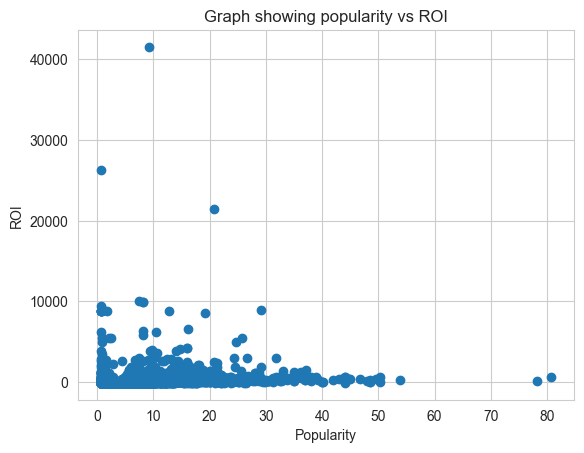

In [271]:

# create a scatter plot of popularity vs ROI


plt.scatter(combined_df['popularity'], combined_df['ROI'])
plt.xlabel('Popularity')
plt.ylabel('ROI')
plt.title('Graph showing popularity vs ROI');

The scatter diagram above is to check the relationship between popularity and Return on investment. Based on the outlook, there is weak relationship.

In [275]:
# calculate the correlation coefficient between popularity and ROI
correlation = combined_df['popularity'].corr(combined_df['ROI'])

print('Correlation coefficient between popularity and ROI:', correlation)


Correlation coefficient between popularity and ROI: 0.04561801803177191


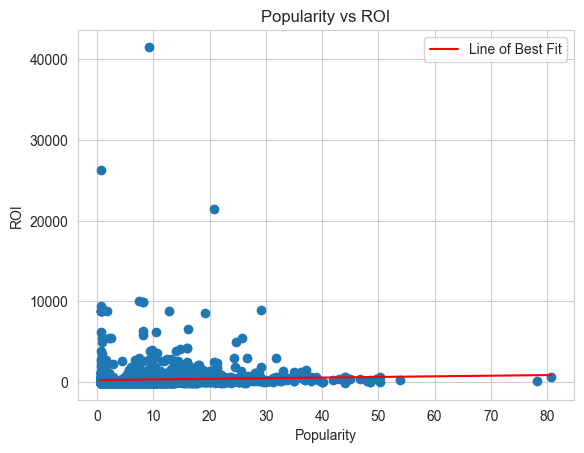

In [280]:
# plot a scatter plot of popularity vs ROI

from scipy.stats import linregress



plt.scatter(combined_df['popularity'], combined_df['ROI'])
plt.xlabel('Popularity')
plt.ylabel('ROI')
plt.title('Popularity vs ROI')

# calculate the slope and intercept of the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(combined_df['popularity'], combined_df['ROI'])
line = slope * combined_df['popularity'] + intercept

# add the line of best fit to the plot
plt.plot(combined_df['popularity'], line, 'r-', label='Line of Best Fit')

plt.legend()
plt.show()

To test for correlation analysis. The relationship is weak.

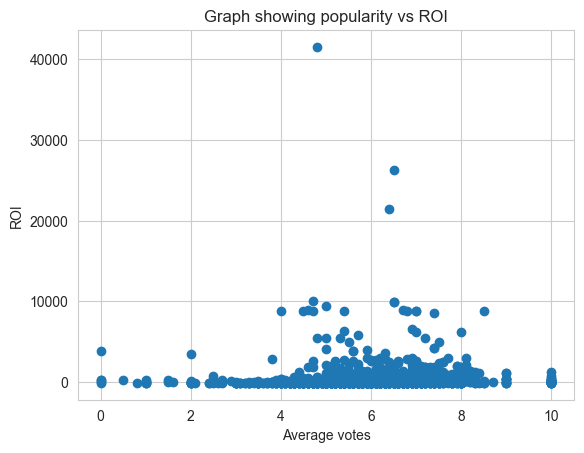

In [272]:
# create a scatter plot of popularity vs ROI

plt.scatter(combined_df['vote_average'], combined_df['ROI'])
plt.xlabel('Average votes')
plt.ylabel('ROI')
plt.title('Graph showing popularity vs ROI');

In [281]:
# Correlation analysis

correlation = combined_df['vote_average'].corr(combined_df['ROI'])
print('Correlation coefficient between vote_average and ROI:', correlation)


Correlation coefficient between vote_average and ROI: 0.031204127737905207


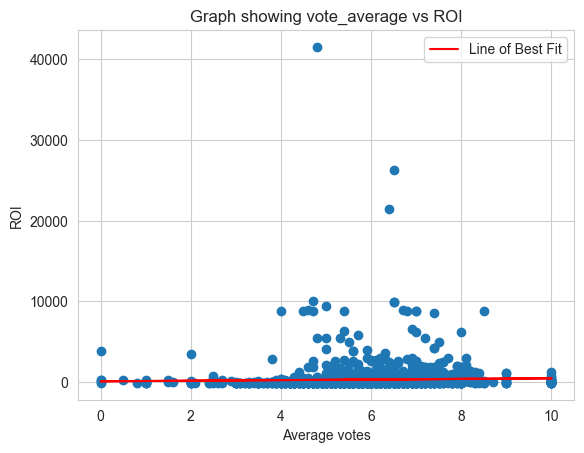

In [282]:
# plot a scatter plot of vote_average vs ROI


plt.scatter(combined_df['vote_average'], combined_df['ROI'])
plt.xlabel('Average votes')
plt.ylabel('ROI')
plt.title('Graph showing vote_average vs ROI')

# calculate the slope and intercept of the line of best fit
slope, intercept, r_value, p_value, std_err = linregress(combined_df['vote_average'], combined_df['ROI'])
line = slope * combined_df['vote_average'] + intercept

# add the line of best fit to the plot
plt.plot(combined_df['vote_average'], line, 'r-', label='Line of Best Fit')

plt.legend()
plt.show()

The above scatter plot shows there is weak correlation between votes_average and return on investment.

In [299]:
#To compute correlation between Vote average and production budget

correlation = combined_df['vote_average'].corr(combined_df['production_budget'])
print('Correlation coefficient between vote_average and production_budget:', correlation)

Correlation coefficient between vote_average and production_budget: 0.12571357050718554


Correlation coefficient between vote_average and production_budget: 0.12571357050718554


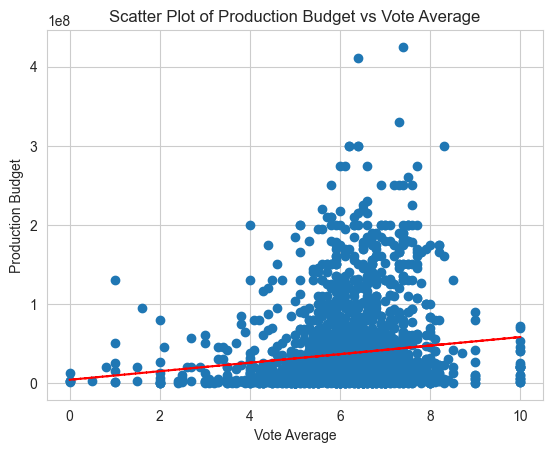

In [301]:
# Ploting graph to show correlation between vote average and production budget

# Assuming you have a pandas DataFrame called 'combined_df' with columns 'vote_average' and 'production_budget'
correlation = combined_df['vote_average'].corr(combined_df['production_budget'])
print('Correlation coefficient between vote_average and production_budget:', correlation)

# Plot a scatter plot
plt.scatter(combined_df['vote_average'], combined_df['production_budget'])
plt.xlabel('Vote Average')
plt.ylabel('Production Budget')
plt.title('Scatter Plot of Production Budget vs Vote Average')

# Add linear regression line
x = combined_df['vote_average']
y = combined_df['production_budget']
p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), 'r--')

plt.show()


* This scatter plot illustrates a positive correlation, which means that movies with higher budgets tend be more highly voted by viewers.

In [302]:
#To compute for correlation between vote average and worldwide gross 

correlation = combined_df['vote_average'].corr(combined_df['worldwide_gross'])
print('Correlation coefficient between vote_average and worldwide_gross:', correlation)

Correlation coefficient between vote_average and worldwide_gross: 0.19034115523998674


Correlation coefficient between vote_average and worldwide_gross: 0.19034115523998674


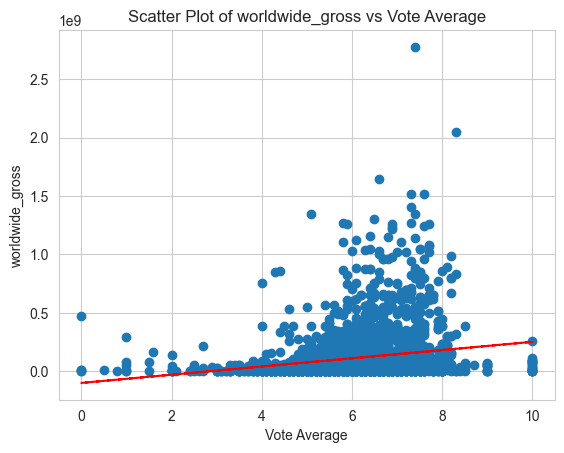

In [303]:
#ploting correlation between vote average and worlwide gross


# Assuming you have a pandas DataFrame called 'combined_df' with columns 'vote_average' and 'production_budget'
correlation = combined_df['vote_average'].corr(combined_df['worldwide_gross'])
print('Correlation coefficient between vote_average and worldwide_gross:', correlation)

# Plot a scatter plot
plt.scatter(combined_df['vote_average'], combined_df['worldwide_gross'])
plt.xlabel('Vote Average')
plt.ylabel('worldwide_gross')
plt.title('Scatter Plot of worldwide_gross vs Vote Average')

# Add linear regression line
x = combined_df['vote_average']
y = combined_df['worldwide_gross']
p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), 'r--')

plt.show()

* The above plot also indicates a positive correlation between revenue and vote average. This means that movies that are more highly rated by viewers tend to make more in revenue.

* There are two rows that can be used to understand the favorability of a movie, 'popularity' and 'vote_average.

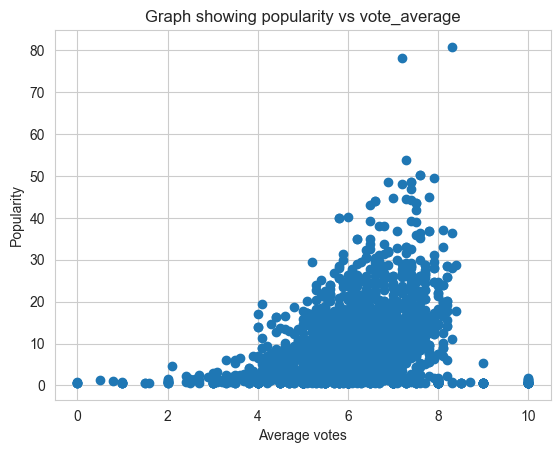

In [496]:
# create a scatter plot of popularity vs ROI
plt.scatter(combined_df['vote_average'], combined_df['popularity'])
plt.xlabel('Average votes')
plt.ylabel('Popularity')
plt.title('Graph showing popularity vs vote_average');

In [495]:
#computing for correlation between vote average and popularity

correlation = combined_df['vote_average'].corr(combined_df['popularity'])
print('Correlation coefficient between vote_average and popularity:', correlation)

Correlation coefficient between vote_average and popularity: 0.29655669504621895


Correlation coefficient between vote_average and popularity: 0.29655669504621895


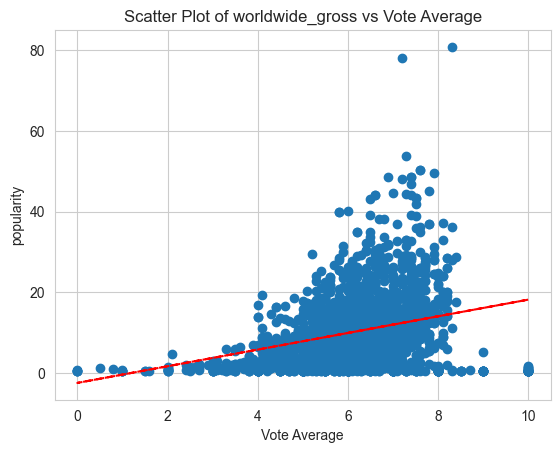

In [558]:
# Assuming you have a pandas DataFrame called 'combined_df' with columns 'vote_average' and 'production_budget'
correlation = combined_df['vote_average'].corr(combined_df['popularity'])
print('Correlation coefficient between vote_average and popularity:', correlation)

# Plot a scatter plot
plt.scatter(combined_df['vote_average'], combined_df['popularity'])
plt.xlabel('Vote Average')
plt.ylabel('popularity')
plt.title('Scatter Plot of worldwide_gross vs Vote Average')

# Add linear regression line
x = combined_df['vote_average']
y = combined_df['popularity']
p = np.polyfit(x, y, 1)
plt.plot(x, np.polyval(p, x), 'r--')

plt.show()

* This indicates positive correlation between votes and popularity
this will answer the question What are the most sucessful distribution channel for movies?

# Rotten_tomatoes

* To load dataframe into notebook

In [283]:
rt_movies_info=pd.read_csv("zippedData/rt.movie_info.tsv.gz",index_col=0, sep='\t',encoding='unicode_escape')
rt_movies_info.head(5)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


* To split the runtime into minutes and runtime unit

In [347]:
# Split runtime column into minutes and units
rt_movies_info['runtime_minutes'] = rt_movies_info['runtime'].str.split().str[0].astype(float)
rt_movies_info['runtime_units'] = rt_movies_info['runtime'].str.split().str[1]


In [349]:
rt_movies_info.head(3)

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,runtime_minutes,runtime_units
id,,,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,104.0,minutes
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,108.0,minutes
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,116.0,minutes


* To load the rt_reviews dataframe into notebook

In [350]:
rt_reviews=pd.read_csv("zippedData/rt.reviews.tsv.gz", index_col=0, sep='\t',encoding='unicode_escape')
rt_reviews.head(5)

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


* Merge rt reviews with tn movies using id to access both cost and revenue

In [522]:
# Load tn_movies
tn_movies = pd.read_csv("zippedData/tn.movie_budgets.csv.gz", index_col=0)

# Merge the two dataframes using 'id' column
rtmerged_df = pd.merge(rt_movies_info, tn_movies, on='id')

# Select specific columns
selected_columns = ["genre", "runtime", "production_budget", "worldwide_gross"]
selected_df = rtmerged_df[selected_columns]

# Print the first 5 rows of the selected dataframe
selected_df.head(5)

,genre,runtime,production_budget,worldwide_gross
id,,,,
1,Action and Adventure|Classics|Drama,104 minutes,"$425,000,000","$2,776,345,279"
1,Action and Adventure|Classics|Drama,104 minutes,"$175,000,000","$731,463,377"
1,Action and Adventure|Classics|Drama,104 minutes,"$145,000,000","$269,806,430"
1,Action and Adventure|Classics|Drama,104 minutes,"$120,000,000","$49,628,177"
1,Action and Adventure|Classics|Drama,104 minutes,"$100,000,000","$89,693,309"


* Clean the production budget and worldwide_gross

In [523]:
# Clean the selected columns
selected_df.loc[:, "worldwide_gross"]=selected_df["worldwide_gross"].astype(str).str.replace(',', '').str.replace('$', '').astype(float)
selected_df.loc[:, "production_budget"]=selected_df["production_budget"].astype(str).str.replace(',', '').str.replace('$', '').astype(float)

# Print the first 5 rows of the cleaned dataframe
selected_df.head(5)

,genre,runtime,production_budget,worldwide_gross
id,,,,
1,Action and Adventure|Classics|Drama,104 minutes,425000000.0,2776345279.0
1,Action and Adventure|Classics|Drama,104 minutes,175000000.0,731463377.0
1,Action and Adventure|Classics|Drama,104 minutes,145000000.0,269806430.0
1,Action and Adventure|Classics|Drama,104 minutes,120000000.0,49628177.0
1,Action and Adventure|Classics|Drama,104 minutes,100000000.0,89693309.0


Splitting and cleaning data in runtime into minutes and units

In [526]:
# Split runtime column into minutes and units

selected_df.loc[:,'runtime_minutes'] = selected_df['runtime'].str.split().str[0].astype(float)
selected_df.loc[:,'runtime_units'] = selected_df['runtime'].str.split().str[1]

In [528]:
selected_df.head(5)

,genre,runtime,production_budget,worldwide_gross,runtime_minutes,runtime_units
id,,,,,,
1,Action and Adventure|Classics|Drama,104 minutes,425000000.0,2776345279.0,104.0,minutes
1,Action and Adventure|Classics|Drama,104 minutes,175000000.0,731463377.0,104.0,minutes
1,Action and Adventure|Classics|Drama,104 minutes,145000000.0,269806430.0,104.0,minutes
1,Action and Adventure|Classics|Drama,104 minutes,120000000.0,49628177.0,104.0,minutes
1,Action and Adventure|Classics|Drama,104 minutes,100000000.0,89693309.0,104.0,minutes


In [530]:
# computation of profit and Roi and creating column for each

selected_df.loc[:, 'profit'] = selected_df['worldwide_gross'] - selected_df['production_budget']
selected_df.loc[:, 'roi'] = (selected_df['profit'] / selected_df['production_budget']) * 100

In [531]:
selected_df.head(5)

,genre,runtime,production_budget,worldwide_gross,runtime_minutes,runtime_units,profit,roi
id,,,,,,,,
1,Action and Adventure|Classics|Drama,104 minutes,425000000.0,2776345279.0,104.0,minutes,2351345279.0,553.257713
1,Action and Adventure|Classics|Drama,104 minutes,175000000.0,731463377.0,104.0,minutes,556463377.0,317.979073
1,Action and Adventure|Classics|Drama,104 minutes,145000000.0,269806430.0,104.0,minutes,124806430.0,86.0734
1,Action and Adventure|Classics|Drama,104 minutes,120000000.0,49628177.0,104.0,minutes,-70371823.0,-58.643186
1,Action and Adventure|Classics|Drama,104 minutes,100000000.0,89693309.0,104.0,minutes,-10306691.0,-10.306691


* To check on which best genre combination to produce

In [532]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4682 entries, 1 to 100
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre              4624 non-null   object 
 1   runtime            4508 non-null   object 
 2   production_budget  4682 non-null   object 
 3   worldwide_gross    4682 non-null   object 
 4   runtime_minutes    4508 non-null   float64
 5   runtime_units      4508 non-null   object 
 6   profit             4682 non-null   object 
 7   roi                4682 non-null   object 
dtypes: float64(1), object(7)
memory usage: 329.2+ KB


* To check for Null values in runtime_minutes column

In [533]:
print(selected_df["runtime_minutes"].isna().sum())

174


In [536]:
#Drop NaN values in runtime_minutes column
selected_columns = ["genre", "runtime_minutes", "production_budget", "worldwide_gross","profit","roi"]
selected_df = selected_df[selected_columns].dropna(subset=["runtime_minutes"])


In [537]:
print(selected_df["runtime_minutes"].isna().sum())

0


* check on duplicates

In [539]:
duplicates=selected_df[selected_df.duplicated(subset='genre', keep=False)]


In [541]:
selected_df['genre'].nunique()


46

* Graph to show the best movie combination for microsoft to focus on.

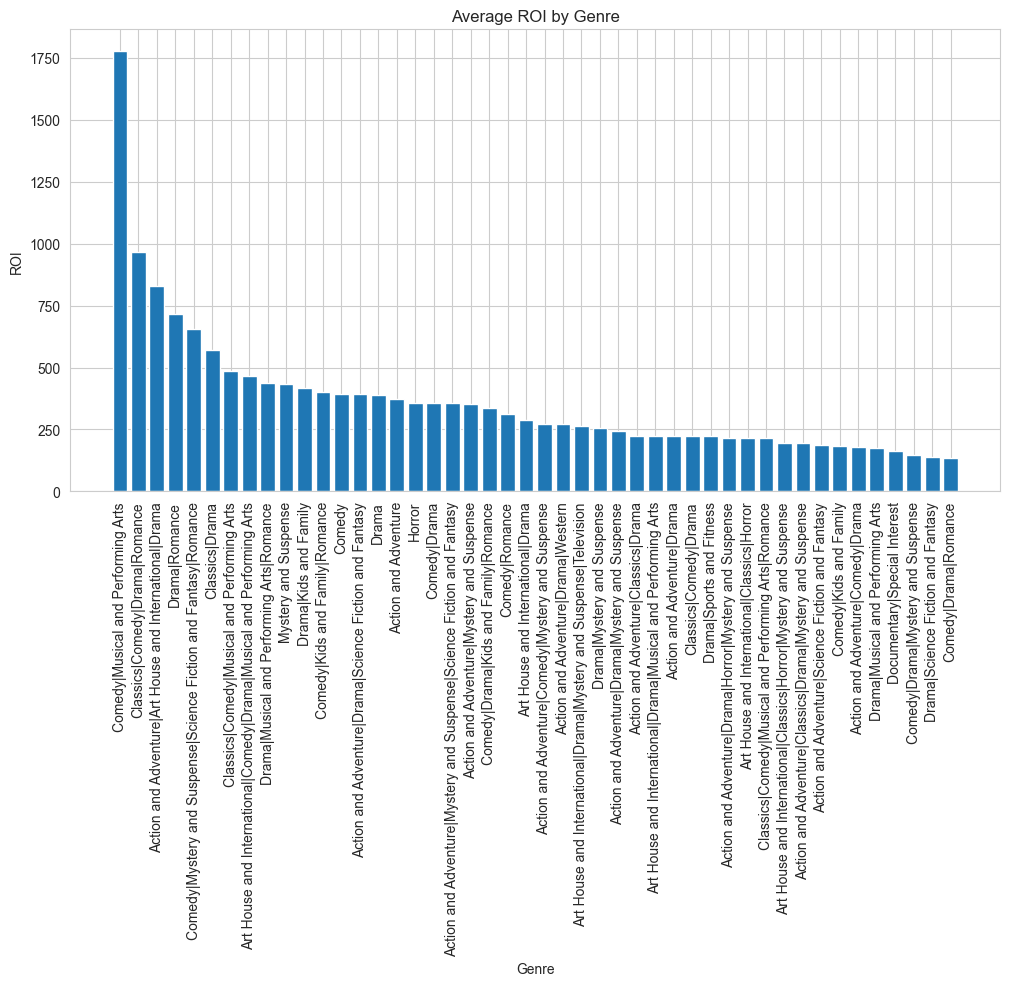

In [542]:
# Plotting a graph to check on the best movie combination 

genre_roi = selected_df.groupby('genre')['roi'].mean().sort_values(ascending=False)
plt.figure(figsize=(12,6))
plt.bar(genre_roi.index, genre_roi.values)
plt.xticks(rotation=90)
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('Average ROI by Genre')
plt.show()


Above graph shows the best combination of movies to focus on
This will answer my questions of which genre_combination types are most likely to be received by the audience and also Which genres combination of the movies have the highest Return on investment

To check on relationship between runtime minutes and roi

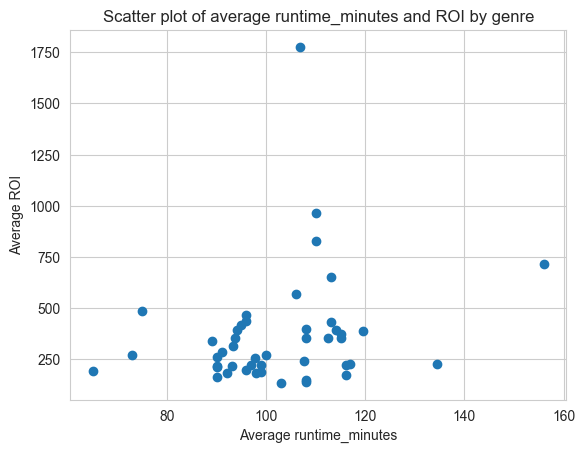

In [548]:
genre_grouped = selected_df.groupby('genre')
genre_avg = genre_grouped.mean()

plt.scatter(genre_avg['runtime_minutes'], genre_avg['roi'])
plt.xlabel('Average runtime_minutes')
plt.ylabel('Average ROI')
plt.title('Scatter plot of average runtime_minutes and ROI by genre');


This shows impact of runtime on ROI

In [556]:
# To determine correlation between runtime_minutes and ROI
correlation = genre_avg['runtime_minutes'].corr(genre_avg['roi'])
print("Correlation between runtime_minutes and ROI:", correlation)


Correlation between runtime_minutes and ROI: 0.23727032972326698


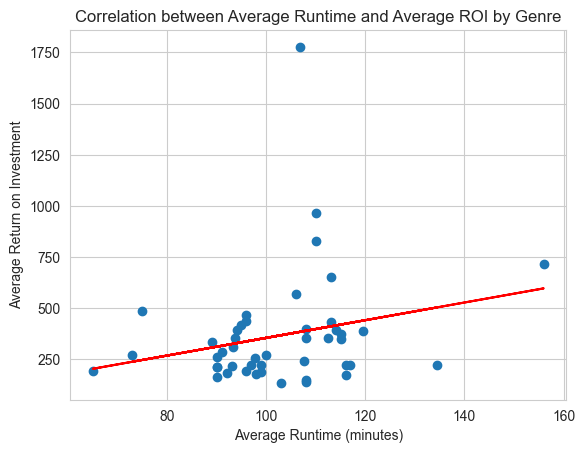

In [553]:
# group data by genre
genre_grouped = selected_df.groupby('genre')
genre_avg = genre_grouped.mean()

# plot scatter plot to show correlation between average ROI and average runtime_minutes per genre
plt.scatter(genre_avg['runtime_minutes'], genre_avg['roi'])
plt.xlabel('Average Runtime (minutes)')
plt.ylabel('Average Return on Investment')
plt.title('Correlation between Average Runtime and Average ROI by Genre')

# calculate and plot line of best fit
m, b = np.polyfit(genre_avg['runtime_minutes'], genre_avg['roi'], 1)
plt.plot(genre_avg['runtime_minutes'], m * genre_avg['runtime_minutes'] + b, color='red')

plt.show()




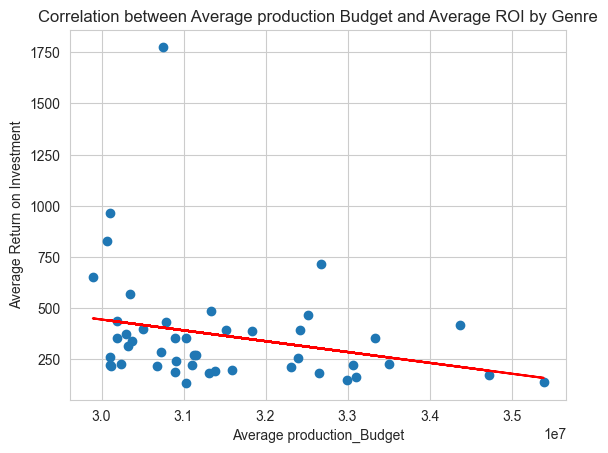

In [571]:
# checking on correlation and plotting scater to show correlation

# Check data types and convert if necessary
if genre_avg['production_budget'].dtype != float:
    genre_avg['production_budget'] = genre_avg['production_budget'].astype(float)

# Check for missing values and remove if necessary
if genre_avg['production_budget'].isnull().sum() > 0:
    genre_avg.dropna(subset=['production_budget'], inplace=True)

# Plot scatter plot to show correlation between average budget and average ROI per genre
plt.scatter(genre_avg['production_budget'], genre_avg['roi'])
plt.xlabel('Average production_Budget')
plt.ylabel('Average Return on Investment')
plt.title('Correlation between Average production Budget and Average ROI by Genre')

# Calculate and plot line of best fit
m, b = np.polyfit(genre_avg['production_budget'], genre_avg['roi'], 1)
plt.plot(genre_avg['production_budget'], m * genre_avg['production_budget'] + b, color='red')

plt.show()

The relationship between the average runtime_minutes against ROI

# CONCLUSSION

* There are many qualities about movies that make them unique from one another. In this project, I was able to analyze these qualities and identify which properties are associated with movie popularity.

* After cleaning and trimming the dataset by removing unnecessary, null, and duplicated values, I created a secondary table that broke each movie down into the separate genres it falls under.

* Then I plotted a few charts to assess what will be used as the dependent variable, popularity or vote average. Because vote average was more evenly distributed, I used this as the variable that indicates favorability among viewers.

* Next, I plotted various other variables against vote average and found that movies with higher vote averages tend to have higher budgets and higher revenue. 
* The popularity of movie and vote average of movies do not depict strong relationship with return on investment. since based on the scatter plots it shows that the relationship is week.
* There is positive correlation between the budget and vote_average. so the company may resolve on improving the budgets in order to translate it to positive returns on investment

* On answering the question on distributor, i focused on popularity and votes average also the best studio for production.
based on analysis, there is weak correlation between the return on investment and popularity. Microsoft should focus on developing the most attractive way to sell their product. creativity and focusing on high quality allround of their movies.
* the analysis also checked on the best studio to produce a movie and the result was WB(NL) is highly valued and they can as well invest in such movie studios.
based on comparisson of vote_average and return on investment, it illustrate that the is positive but weak correlation between the two. the positivity may improve only if the company will increase the the budget and focus more on popularizing the product. This will improve on the average votes and may as well lead to increase in return on investment.
There is a positive and strong correlation between the popularity and vote average and also vote average and production budget.


* On the question of which genre combination should microsoft focus on,
  The analysis found that the best combination whict is attractive to the market include comedy, musical and performing arts.     this is highly appreciated by the populations also drama and Romance movies is attractive to the group. Microsoft studio         should invest more funds on these combinationation in order to realize returns. Focus on this through heavy budget allocations   on production and distribution will improve on return on investment.
* The anlysis also focused on checking the correlation between production budget and return on investment. This shows investing   heavily on production of movies may not transaltes to return on investment. 
  There are other factors which may set in like, quality, content and also marketting strategies. The company should try to       balance all aspects inorder to improve on return on investments.
* Runtime also was analysed. the results shows positive correlation between runtime and return on investment. Running the movie   shows in theatres may greatly increase the return on investment. microsoft should also consider this avenue.

# Recommendations

Based on the analysis I recommend the following to Micrososft studio:
 * After careful consideration of the findings above, I had two recommendations regarding movie type:
   Release comedy, musical, performing arts, drama and Romance movies as this is highly captivating the population
 * After careful consideration of the findings above, my main observation was that a higher production budget leads to a higher    gross. I had two specific recommendations regarding production budget for the preferred movie types: invest more on comedy      performing arts, musical, drama and also romance as thiese are top notch genres.
 * Also commit more funds in promotional activities, quality and content of movies being produced
 